Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37151
         1.0       1.00      1.00      1.00      2633

    accuracy                           1.00     39784
   macro avg       1.00      1.00      1.00     39784
weighted avg       1.00      1.00      1.00     39784

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37151
         1.0       1.00      1.00      1.00      2633

    accuracy                           1.00     39784
   macro avg       1.00      1.00      1.00     39784
weighted avg       1.00      1.00      1.00     39784

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37151
         1.0       1.00      1.00      1.00      2633

    accuracy                           1.00     39784
 

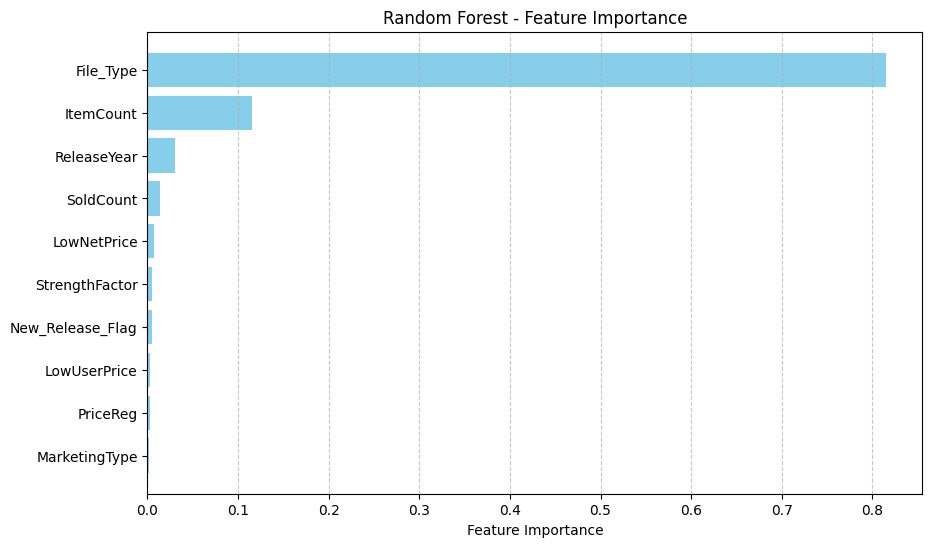

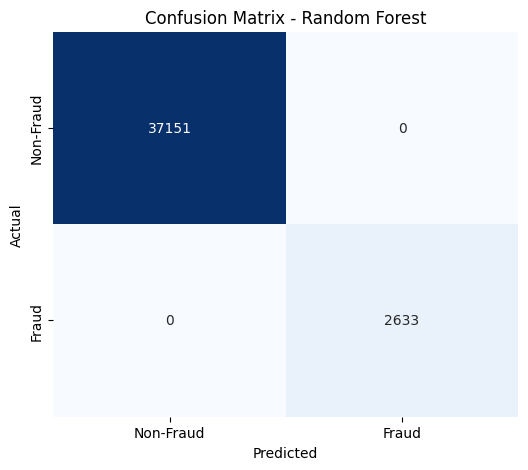

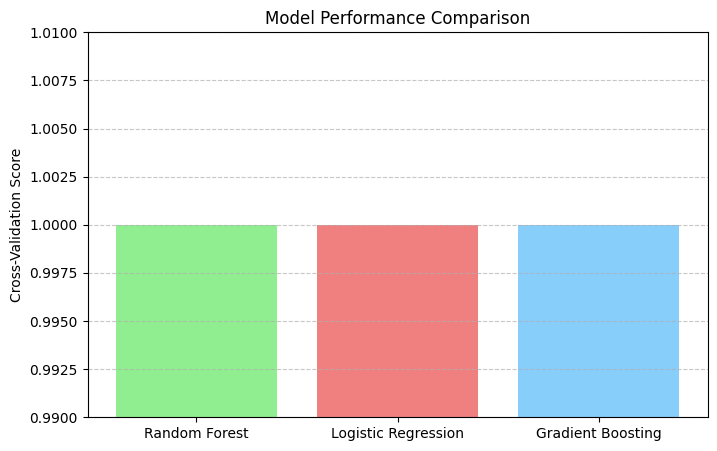

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets

# Load the dataset
file_path = 'A://SalesKaggle3.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

# Preprocess the data
data.fillna(0, inplace=True)

# Assuming 'SoldFlag' is the target column (1 = fraud, 0 = non-fraud)
target = 'SoldFlag'
features = data.drop(columns=[target, 'Order', 'SKU_number', 'ReleaseNumber'])

# Encoding categorical features
label_encoder = LabelEncoder()
features['MarketingType'] = label_encoder.fit_transform(features['MarketingType'])
features['New_Release_Flag'] = label_encoder.fit_transform(features['New_Release_Flag'])

# Feature engineering: Price variance between regular price and low user price
features['Price_Variance'] = features['PriceReg'] - features['LowUserPrice']

# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.select_dtypes(include=[np.number]))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data[target], test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize classifiers
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train models
rf_model.fit(X_train_res, y_train_res)
lr_model.fit(X_train_res, y_train_res)
gb_model.fit(X_train_res, y_train_res)

# Predict on the test set
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluate models
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_pred))

print("Logistic Regression - Classification Report:")
print(classification_report(y_test, lr_pred))

print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, gb_pred))

# Confusion matrix for Random Forest
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# Cross-validation scores for each model
print("Random Forest Cross-Validation Score:")
print(np.mean(cross_val_score(rf_model, X_train_res, y_train_res, cv=5)))

print("Logistic Regression Cross-Validation Score:")
print(np.mean(cross_val_score(lr_model, X_train_res, y_train_res, cv=5)))

print("Gradient Boosting Cross-Validation Score:")
print(np.mean(cross_val_score(gb_model, X_train_res, y_train_res, cv=5)))

# Random Forest feature importance visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Print feature importances in text format
print("Random Forest - Feature Importances:")
for i in indices:
    print(f"{features.columns[i]}: {importances[i]}")


plt.figure(figsize=(10, 6))
plt.barh(features.columns[indices], importances[indices], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Confusion matrix heatmap for Random Forest
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Non-Fraud", "Fraud"], 
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Model performance comparison
models = ["Random Forest", "Logistic Regression", "Gradient Boosting"]
cv_scores = [
    np.mean(cross_val_score(rf_model, X_train_res, y_train_res, cv=5)),
    np.mean(cross_val_score(lr_model, X_train_res, y_train_res, cv=5)),
    np.mean(cross_val_score(gb_model, X_train_res, y_train_res, cv=5))
]

plt.figure(figsize=(8, 5))
plt.bar(models, cv_scores, color=["lightgreen", "lightcoral", "lightskyblue"])
plt.ylim(0.99, 1.01)
plt.ylabel("Cross-Validation Score")
plt.title("Model Performance Comparison")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
